# Importing Libraries for Data Processing, Model Building

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow
import os
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks


# load dataset for Pneumonia Detection

In [2]:
test_path = r"C:\Users\PMYLS\OneDrive\Desktop\pascal\xray-main\chest_xray\test"
train_path = r"C:\Users\PMYLS\OneDrive\Desktop\pascal\xray-main\chest_xray\train"
val_path = r"C:\Users\PMYLS\OneDrive\Desktop\pascal\xray-main\chest_xray\val"

# Loading and Labeling Training Dataset 

In [3]:
import os
train_images_path = []
train_images_labels = []
train_folders = os.listdir(train_path)
for train_folder in train_folders:
    if "NORMAL" in train_folder or "PNEUMONIA" in train_folder:
        folder_path  = os.path.join(train_path, train_folder)
        
        
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            train_images_path.append(file_path) 
            train_images_labels.append(train_folder)




# Loading and Labeling Testing Dataset

In [4]:
test_images_path = []
test_images_labels = []
test_folders = os.listdir(test_path)
for test_folder in test_folders:
    if "NORMAL" in test_folder or "PNEUMONIA" in test_folder:
        folder_path  = os.path.join(test_path, test_folder)
        
        
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            test_images_path.append(file_path) 
            test_images_labels.append(test_folder)

# Loading and Labeling Validation Dataset

In [5]:
val_images_path = []
val_images_labels = []
val_folders = os.listdir(val_path)
for val_folder in val_folders:
    if "NORMAL" in val_folder or "PNEUMONIA" in val_folder:
        folder_path  = os.path.join(val_path, val_folder)
        
        
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            val_images_path.append(file_path) 
            val_images_labels.append(val_folder)

In [6]:
train_df = pd.DataFrame(list(zip(train_images_path, train_images_labels)), columns=["train_images_path", "labels"])
test_df = pd.DataFrame(list(zip(test_images_path, test_images_labels)), columns=["test_images_path", "labels"])
val_df = pd.DataFrame(list(zip(val_images_path, val_images_labels)), columns=["val_images_path", "labels"])

In [7]:
print("Train Images Shape", train_df.shape)
print("Test Images Shape", test_df.shape)
print("Val Images Shape", val_df.shape)


Train Images Shape (5218, 2)
Test Images Shape (624, 2)
Val Images Shape (18, 2)


# Displaying and Verifying a Training Image from the Dataset

(1434, 1810, 3)


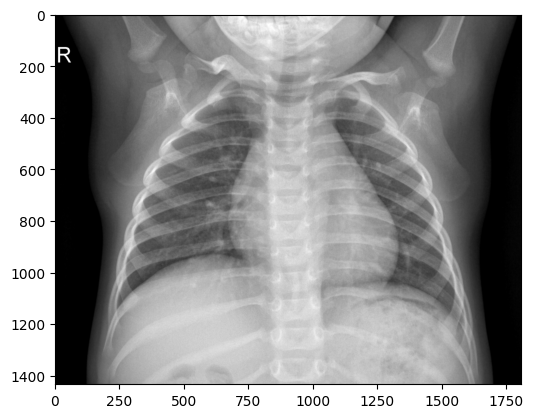

In [12]:

for i in range(3,4):
   img =train_df["train_images_path"][i]
   
   read_img = cv2.imread(img)
   if read_img is not None:
    print(read_img.shape)
    plt.imshow(read_img)
    plt.show()
   else:
        print(f"Image {read_img} could not be loaded.")

# Image Data Generator

In [13]:


# Create an ImageDataGenerator instance with optional data augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,             # Normalize pixel values (0-1 range)
    rotation_range=20,           # Randomly rotate images
    width_shift_range=0.2,       # Randomly shift images horizontally
    height_shift_range=0.2,      # Randomly shift images vertically
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Randomly zoom in on images
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest'          # How to fill in new pixels
)

In [14]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='train_images_path',          # Column with image paths
    y_col='labels',             # Column with class labels
    target_size=(224, 224),    # Resize all images to 224x224
    batch_size=64,             # Number of images in each batch
    class_mode='binary'   # For multi-class classification
)


Found 5216 validated image filenames belonging to 2 classes.


C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="train_images_path". These filename(s) will be ignored.
  warnings.warn(


In [20]:
# Get a batch of images and labels
images, labels = next(train_generator)

# Print the shape of the images and labels
# Shape will be (batch_size, target_size[0], target_size[1], channels)
print(f"Image batch shape: {images.shape}")   # For the images
print(f"Label batch shape: {labels.shape}")   # For the labels

# You can also check the shape of an individual image
print(f"Single image shape: {images[0].shape}")


Image batch shape: (64, 224, 224, 3)
Label batch shape: (64,)
Single image shape: (224, 224, 3)


In [23]:
val_generator = datagen.flow_from_dataframe(
    dataframe = val_df,
    x_col = "val_images_path",
    y_col = "labels",
    target_size = (224,224),
    batch_size = 64,
    class_mode = "binary"
)

Found 16 validated image filenames belonging to 2 classes.


C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="val_images_path". These filename(s) will be ignored.
  warnings.warn(


In [24]:
# Get a batch of images and labels
images, labels = next(val_generator)

# Print the shape of the images and labels
# Shape will be (batch_size, target_size[0], target_size[1], channels)
print(f"Image batch shape: {images.shape}")   # For the images
print(f"Label batch shape: {labels.shape}")   # For the labels

# You can also check the shape of an individual image
print(f"Single image shape: {images[0].shape}")


Image batch shape: (16, 224, 224, 3)
Label batch shape: (16,)
Single image shape: (224, 224, 3)


In [25]:
test_generator = datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = "test_images_path",
    y_col = "labels",
    target_size = (224, 224),
    batch_size = 64,
    class_mode = "binary"
)

Found 624 validated image filenames belonging to 2 classes.


In [26]:
# Get a batch of images and labels
images, labels = next(test_generator)

# Print the shape of the images and labels
# Shape will be (batch_size, target_size[0], target_size[1], channels)
print(f"Image batch shape: {images.shape}")   # For the images
print(f"Label batch shape: {labels.shape}")   # For the labels

# You can also check the shape of an individual image
print(f"Single image shape: {images[0].shape}")

Image batch shape: (64, 224, 224, 3)
Label batch shape: (64,)
Single image shape: (224, 224, 3)


# Labels

In [27]:
classes = ["NORMAL", "PNEUMONIA"]

# VGG16 Architectures

In [29]:
from tensorflow.keras.applications import VGG16
# Load the VGG16 model, excluding the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base to avoid updating the pre-trained weights
base_model.trainable = False

# Build your model
model = Sequential()

# Add the pre-trained VGG16 base model
model.add(base_model)

# Add a Flatten layer to convert 3D output of the base model to 1D
model.add(Flatten())

# Fully connected layer
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Adding dropout for regularization

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,753 (80.64 MB)

 Trainable params: 6,423,553 (24.50 MB)

 Non-trainable params: 14,715,200 (56.13 MB)

In [40]:
model.compile(optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
              loss='binary_crossentropy',           # Binary cross-entropy loss function
              metrics=['accuracy'])   

In [32]:
early_stopping = callbacks.EarlyStopping(
    patience=10,
    verbose=0,
    monitor='val_loss',
    mode='min',
    baseline = None,
    restore_best_weights = True,
    min_delta=0
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    verbose=0,
    patience=4,
    factor=.2
)

## **Training The Model**

In [33]:
history = model.fit(x = train_generator, epochs = 1, validation_data = val_generator, 
                     callbacks = [early_stopping, plateau])

C:\Users\PMYLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 994s 12s/step - accuracy: 0.8262 - loss: 0.4662 - val_accuracy: 0.8125 - val_loss: 0.4425 - learning_rate: 0.0010


## **Testing The Model**

In [34]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 94s 9s/step - accuracy: 0.8744 - loss: 0.2736
Test Accuracy: 88.78%


# Visualizing Actual vs Predicted values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


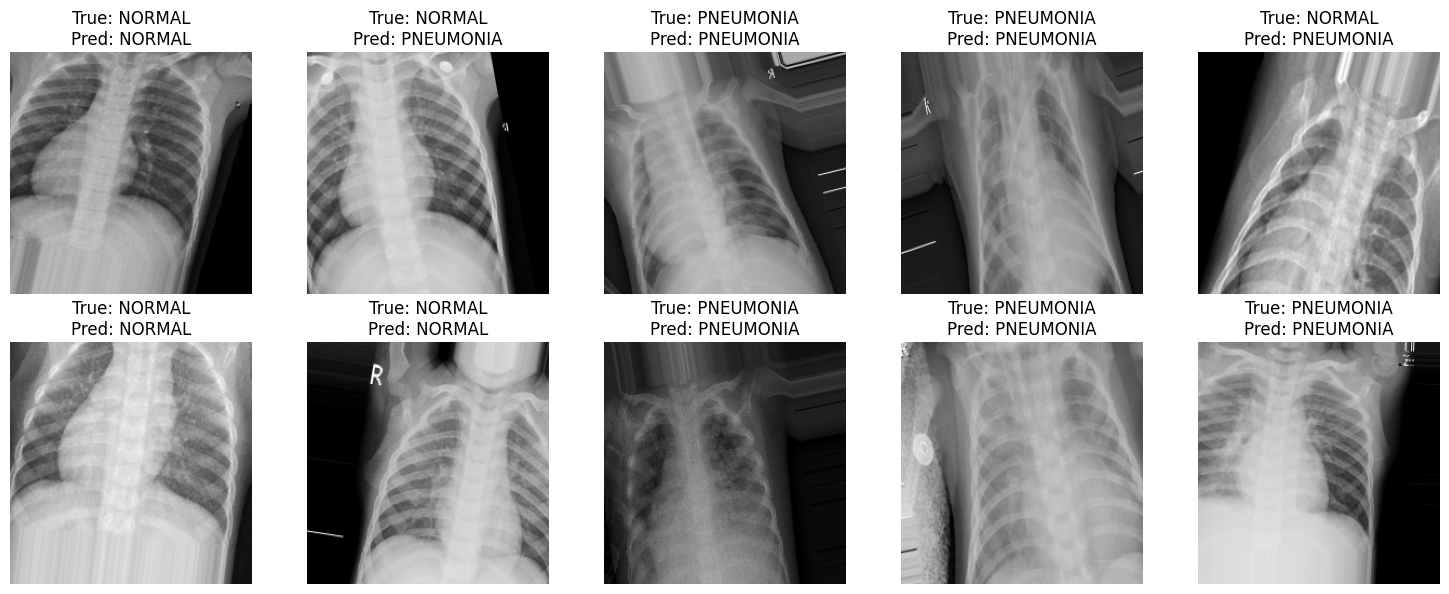

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `class_labels = ['NORMAL', 'PNEUMONIA']`
class_labels = ['NORMAL', 'PNEUMONIA']

# Create a 2x5 grid for displaying images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns

# Loop through to display 10 images
for i in range(10):
    # Get a batch of images and labels from the test generator
    test_images, test_labels = next(test_generator)  # Fetch the next batch of images and labels
    num = np.random.randint(1, len(test_images))  # Random index for image in the batch
    
    # Extract the image and label
    single_image = test_images[num]
    single_image_label = test_labels[num]

    # If labels are one-hot encoded (e.g., [1, 0] or [0, 1]), convert them back to integer class index
    if len(single_image_label.shape) > 0 and single_image_label.size > 1:
        true_class = np.argmax(single_image_label)  # Converts one-hot to class index
    else:
        true_class = int(single_image_label)  # Already a scalar, no conversion needed

    # Expand dimensions to match the input shape of the model (1, height, width, channels)
    single_image_exp = np.expand_dims(single_image, axis=0)

    # Make a prediction
    prediction = model.predict(single_image_exp)
    predicted_label = "PNEUMONIA" if prediction > 0.5 else "NORMAL"

    # Select the appropriate subplot (row, column)
    ax = axes[i // 5, i % 5]

    # Remove extra dimension for displaying
    ax.imshow(single_image)  # No need for cv2 conversion
    ax.set_title(f"True: {class_labels[true_class]}\nPred: {predicted_label}")
    ax.axis('off')  # Turn off axis

# Display the grid of images
plt.tight_layout()
plt.show()


# Save Model

In [99]:
model.save("CNN.h5")  # Guarda todo el modelo, incluyendo la arquitectura, los pesos y la configuración de entrenamiento en un archivo.
model.save_weights("CNN.weights.h5")